In [8]:
import pandas as pd 
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

In [9]:
data = pd.read_csv('./score_manual.csv', sep=';')

In [10]:
score = data['score']
max = score.max()
mean = score.mean()
gt_0 = score[score > 0].count()
print(max)
print(mean)
print(gt_0)

18.29
3.5649050000000004
10000


In [11]:
s = RegressionExperiment()
s.setup(data, target = 'score', session_id = 10)

,Description,Value
0,Session id,10
1,Target,score
2,Target type,Regression
3,Original data shape,"(10000, 38)"
4,Transformed data shape,"(10000, 38)"
5,Transformed train set shape,"(7000, 38)"
6,Transformed test set shape,"(3000, 38)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0368,0.0051,0.0694,0.9988,0.0096,0.0095,2.9730
lightgbm,Light Gradient Boosting Machine,0.0804,0.0235,0.1504,0.9946,0.0207,0.0199,0.2000
gbr,Gradient Boosting Regressor,0.1225,0.0457,0.2115,0.9894,0.0325,0.0326,0.5910
et,Extra Trees Regressor,0.1207,0.0551,0.2317,0.9872,0.0312,0.0287,2.2050
rf,Random Forest Regressor,0.1299,0.0613,0.2448,0.9858,0.0335,0.0307,2.4410
dt,Decision Tree Regressor,0.2351,0.1732,0.4152,0.9594,0.0605,0.0564,0.0650
knn,K Neighbors Regressor,0.5016,0.7007,0.8350,0.8367,0.1281,0.1237,0.0610
br,Bayesian Ridge,0.6482,0.8247,0.9061,0.8076,0.2194,0.2191,0.0360
ridge,Ridge Regression,0.6490,0.8252,0.9065,0.8075,0.2198,0.2195,0.0210
lr,Linear Regression,0.6490,0.8253,0.9065,0.8075,0.2198,0.2196,0.7400


In [14]:
print(best)

In [15]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

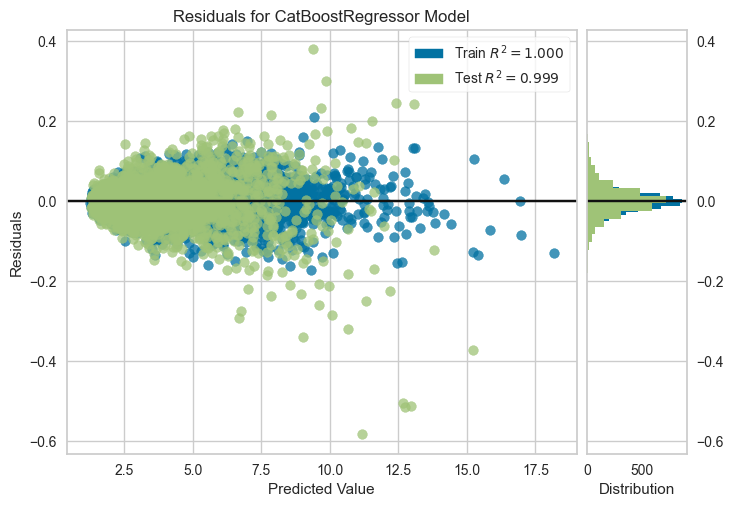

In [16]:
s.plot_model(best, plot = 'residuals')

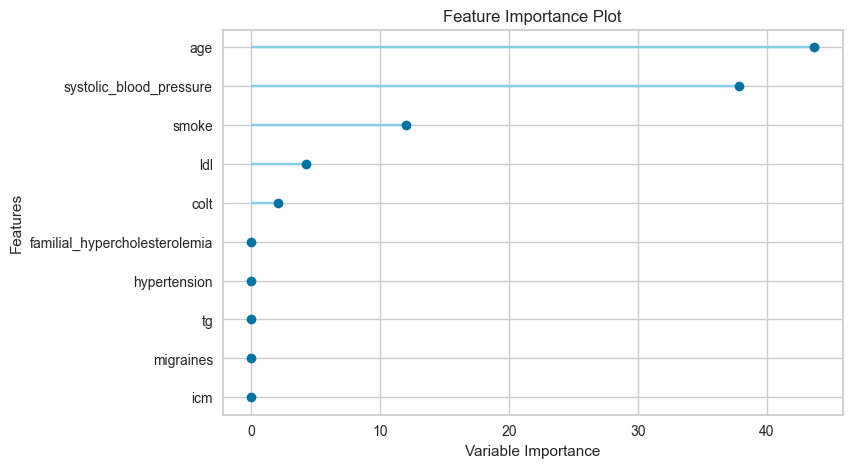

In [17]:
s.plot_model(best, plot = 'feature')

In [18]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0338,0.0029,0.0534,0.9992,0.0090,0.0092


,age,gender,ethnic,poverty,smoke,ascvd,icm,mellitus_diabetis,hypertension,dyslipidemia,...,severe_obstructive_sleep_apnea,fatty_liver,erectile_dysfunction,rheumatoid_arthritis,migraines,systemic_lupus_erythematosus,alzheimer,systolic_blood_pressure,score,prediction_label
937,20437,0,0,1,0,0,35.279999,0,0,0,...,0,0,0,0,1,0,0,121,2.96,3.014752
9355,21953,1,0,0,0,0,29.209999,1,0,0,...,0,0,0,0,0,0,0,84,2.57,2.539477
2293,27275,1,0,1,1,0,35.599998,0,0,1,...,0,1,0,0,0,0,0,117,5.79,5.914438
192,22660,0,0,0,0,0,29.820000,1,1,0,...,0,0,0,0,0,0,0,149,4.10,4.114690
8675,12711,0,0,0,0,0,21.110001,0,1,1,...,0,1,0,0,0,0,0,113,1.91,1.911359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,29032,1,0,0,0,0,20.889999,0,1,1,...,0,0,0,0,0,0,0,77,3.36,3.325961
8978,11436,1,0,0,0,0,24.150000,1,0,1,...,0,0,0,0,0,0,0,95,1.74,1.744723
7540,23776,0,0,0,0,0,21.120001,0,1,1,...,0,0,0,0,0,0,0,191,6.36,6.327773
5275,15520,1,0,0,1,0,26.379999,0,1,1,...,0,0,0,0,0,0,0,142,3.02,3.009222


In [19]:
predictions = s.predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0266,0.0016,0.0400,0.9996,0.0074,0.0076


,age,gender,ethnic,poverty,smoke,ascvd,icm,mellitus_diabetis,hypertension,dyslipidemia,...,severe_obstructive_sleep_apnea,fatty_liver,erectile_dysfunction,rheumatoid_arthritis,migraines,systemic_lupus_erythematosus,alzheimer,systolic_blood_pressure,score,prediction_label
0,20079,1,0,0,0,0,26.900000,0,1,1,...,0,1,0,0,0,0,0,98,2.54,2.520666
1,8484,1,0,0,0,0,24.389999,0,1,0,...,0,1,0,0,0,0,0,169,1.85,1.876726
2,12889,0,0,0,0,0,26.950001,1,0,0,...,0,1,0,0,0,0,0,137,2.15,2.151175
3,22123,0,0,0,0,0,20.430000,0,0,1,...,0,0,0,0,0,0,0,137,3.58,3.630669
4,10125,0,0,0,1,0,19.139999,0,0,1,...,0,0,0,0,0,0,0,108,1.82,1.826657


In [21]:
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'gender', 'ethnic',
                                              'poverty', 'smoke', 'ascvd', 'icm',
                                              'mellitus_diabetis',
                                              'hypertension', 'dyslipidemia',
                                              'familial_hypercholesterolemia',
                                              'alco', 'atrial_fibrillation',
                                              'anxiety_disorder',
                                              'depressive_disorder', 'psychosis',
                                              'colt', 'ldl', 'tg',
                                              'antidepressants',...
                                              'renal_replacement_therapy',
                                              'kidney_transplant',
                                        

In [22]:
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\jordi\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'gender', 'ethnic',
                                             'poverty', 'smoke', 'ascvd', 'icm',
                                             'mellitus_diabetis',
                                             'hypertension', 'dyslipidemia',
                                             'familial_hypercholesterolemia',
                                             'alco', 'atrial_fibrillation',
                                             'anxiety_disorder',
                                             'depressive_disorder', 'psychos...
                                             'renal_replacement_therapy',
                                             'kidney_transplant',
                                             'COVID_history', 'anemima',
                     